In [1]:
import calour as ca
%matplotlib notebook

In [2]:
ca.set_log_level(11)

# Load the ants dataset
Data from:

"Dramatic Differences in Gut Bacterial Densities Correlate with Diet and Habitat in Rainforest Ants"

Jon G. Sanders,1,*,† Piotr Łukasik,‡ Megan E. Frederickson,§ Jacob A. Russell,‡ Ryuichi Koga,¶
Rob Knight† and Naomi E. Pierce*

In [4]:
dat=ca.read_amplicon('./all.withtax.biom','./map.txt',normalize=10000,min_reads=1000)

2017-08-31 17:03:16 INFO loaded 389 samples, 41409 observations
2017-08-31 17:03:16 WARNING the samples are dropped because they have metadata but do not have data: {'10343.JS1991', '10343.JS2101', '10343.BLANK.JS6.12F', '10343.JS0638', '10343.JS1399', '10343.JS0604.e', '10343.JS1852', '10343.JS1138', '10343.JS1625', '10343.JS1784', '10343.JS1368', '10343.BLANK.JS6.12G', '10343.JS1901', '10343.JS1553', '10343.JS1354.f', '10343.JS2004', '10343.JS1297.h', '10343.JS2113', '10343.JS1452', '10343.JS1648', '10343.JS1125', '10343.JS1689.b', '10343.JS1180.f', '10343.JS1165.d', '10343.JS1749', '10343.JS1000', '10343.JS1297.d', '10343.JS2068.b', '10343.JS2182.f', '10343.JS0931', '10343.JS1900', '10343.JS1344', '10343.JS1213', '10343.JS1041', '10343.JS2068.c', '10343.JS2089.d', '10343.JS1564.a', '10343.JS0835', '10343.JS1611.d', '10343.JS1603', '10343.JS1139', '10343.JS1170', '10343.JS1375', '10343.JS1180.d', '10343.JS1378', '10343.JS1796', '10343.JS1684', '10343.JS1273', '10343.JS1215', '10343.J

## Filter and sort samples and features
Keeping only main ant genus samples (ones that have at least 14 adult samples per genus), and only interesting features (enough reads)

In [6]:
datc = dat.filter_samples('genus',['Camponotus','Dolichoderus','Cephalotes','Neoponera','Azteca'])
datc = datc.filter_min_abundance(100)
datc=datc.sort_samples('life_stage').sort_samples('primer_plate').sort_samples('colony').sort_samples('genus')

2017-08-31 17:03:48 INFO 455 remaining


In [7]:
datc = datc.cluster_features()

2017-08-31 17:03:50 INFO 455 remaining


## Plot the whole experiment heatmap (fig 4A)

<IPython.core.display.Javascript object>


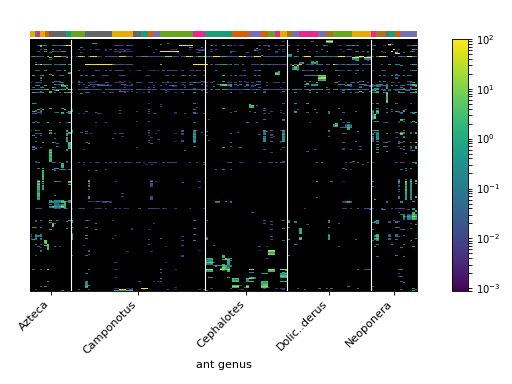

In [8]:
f=datc.normalize(100).plot(sample_field='genus',gui='jupyter',sample_color_bars=['colony'],color_bar_label=False, feature_field=None,clim=[0,100])
f.axes.set_xlabel('ant genus')

In [9]:
f.save_figure('figure-4A-ants-all.pdf')

# Plate dependent contaminant

For the plate contaminant, look at all samples (since we sort by plate)

In [10]:
alldatc = dat.filter_min_abundance(10)
alldatc=alldatc.sort_samples('life_stage').sort_samples('primer_plate').sort_samples('colony').sort_samples('genus')
alldatc=alldatc.cluster_features()

2017-08-31 17:04:19 INFO 8292 remaining
2017-08-31 17:04:19 INFO 8292 remaining


Interactively explore to find the candidate contamination bacteria
and print their axes ranges for the zoom plot

<IPython.core.display.Javascript object>


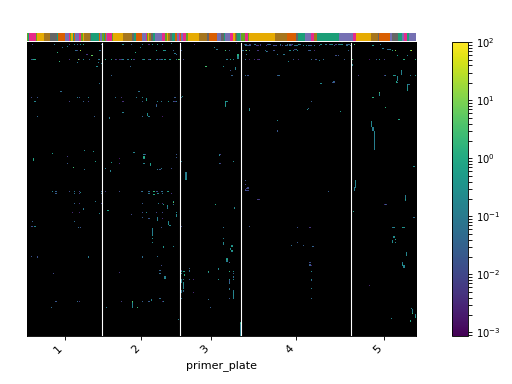

In [11]:
f=alldatc.normalize(100).plot_sort('primer_plate',gui='jupyter',sample_color_bars=['genus'],color_bar_label=False,
               feature_field=None,clim=[0,100])

## Save the plate dependent contaminant (Fig 4B)

After zooming in and exploring in the the previous plot, we plot only the specified the region showing the contaminant:

<IPython.core.display.Javascript object>


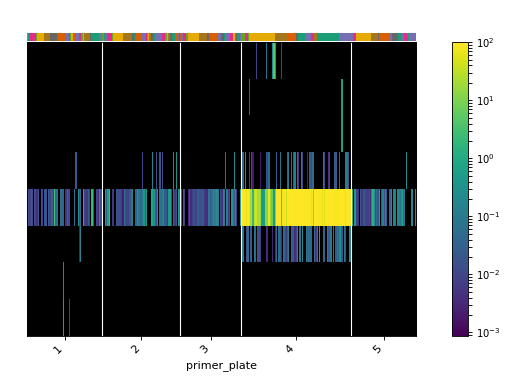

In [12]:
f=alldatc.normalize(100).plot_sort('primer_plate',gui='jupyter',sample_color_bars=['genus'],color_bar_label=False,
                                feature_field=None,clim=[0,100],
                                rect=[-0.5, 314.5, 19.5, 11.5])

In [13]:
f.save_figure('figure-4B-ants-plate-contaminant.pdf')

## look for general reagent contaminants

keep only the 5 main genuses for the plot to make it nicer

<IPython.core.display.Javascript object>


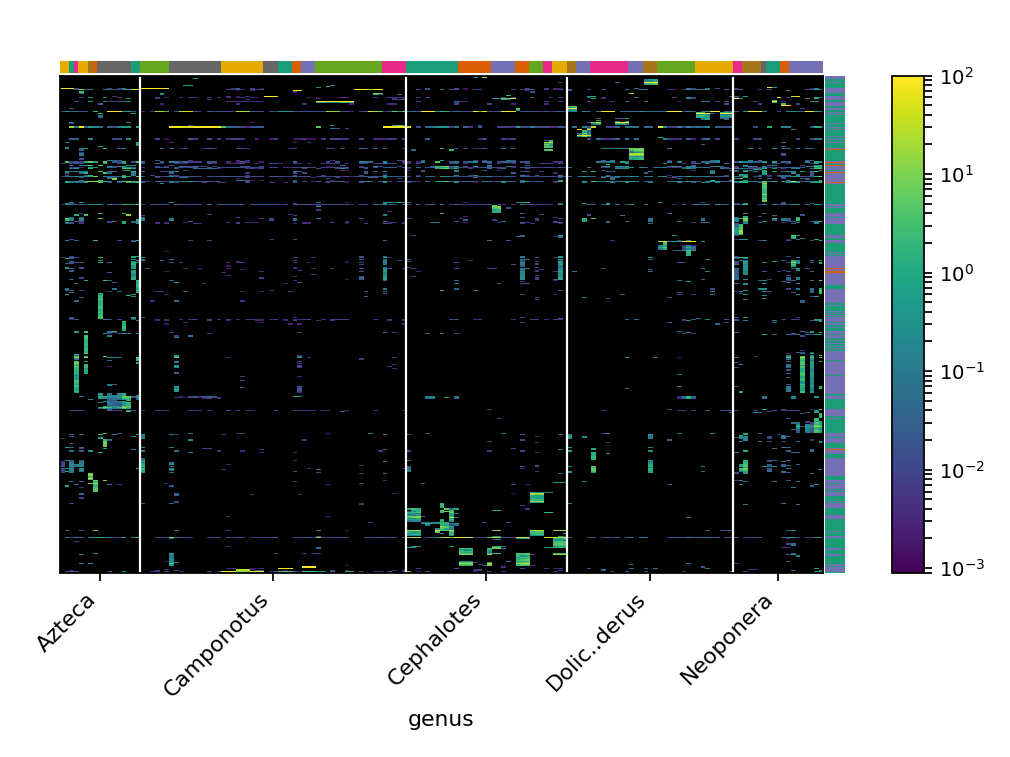

In [15]:
f=datc.normalize(100).plot(sample_field='genus',gui='jupyter',sample_color_bars=['colony'],
                           feature_color_bars=['common_term'],
                           color_bar_label=False,
                           feature_field=None,clim=[0,100])

In [14]:
general_contam = alldatc.filter_samples('genus',['Camponotus','Dolichoderus','Cephalotes','Neoponera','Azteca'])
general_contam.add_terms_to_features('dbbact',['contaminant'])

AmpliconExperiment all.withtax.biom with 161 samples, 8292 features

Interactively explore to find the contaminant block and save the cooredinates

<IPython.core.display.Javascript object>


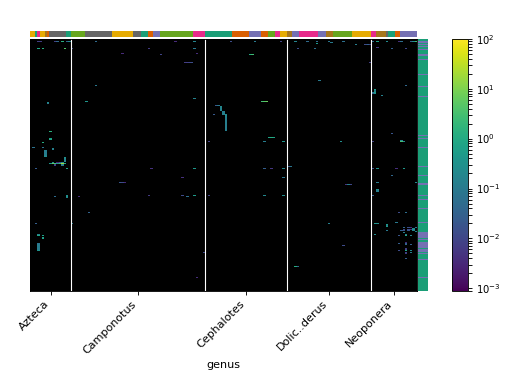

In [15]:
f=general_contam.normalize(100).plot(sample_field='genus',gui='jupyter',sample_color_bars=['colony'],
                           feature_color_bars=['common_term'],
                           color_bar_label=False,
                           feature_field=None,clim=[0,100])

## Save general contaminant figure (Fig 4C)
feature colorbar : orange - contaminant, blue - other, green - unknown

<IPython.core.display.Javascript object>


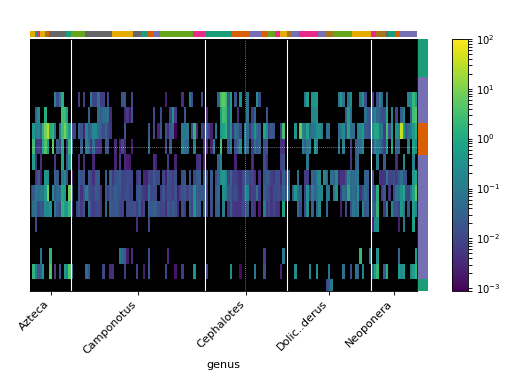

In [16]:
f=general_contam.normalize(100).plot(sample_field='genus',gui='jupyter',sample_color_bars=['colony'],
                                     feature_color_bars=['common_term'],
                                     color_bar_label=False,
                                     feature_field=None,clim=[0,100],
                                     rect=[-0.5, 160.5, 145.2578125, 129.0625])

In [17]:
f.save_figure('figure-4C-ants-general-contaminant.eps', format='eps')

## saved the 3 plate dependent contaminants to "contamination.fa" using the gui

## saved the 8 general contaminants to contamination2.fa

# Filter for contaminants and keep only main genuses/life stage

## Only remove the per plate contaminants
save to ants-filtered-1.biom

In [27]:
datn=ca.read_amplicon('./all.withtax.biom', './map.txt', normalize=None, min_reads=None)

2017-08-31 17:20:56 INFO loaded 389 samples, 41409 observations
2017-08-31 17:20:56 INFO No metadata associated with features in biom table
2017-08-31 17:20:56 WARNING the samples are dropped because they have metadata but do not have data: {'10343.JS1991', '10343.JS2101', '10343.BLANK.JS6.12F', '10343.JS0638', '10343.JS1399', '10343.JS0604.e', '10343.JS1852', '10343.JS1138', '10343.JS1625', '10343.JS1784', '10343.JS1368', '10343.BLANK.JS6.12G', '10343.JS1901', '10343.JS1553', '10343.JS1354.f', '10343.JS2004', '10343.JS1297.h', '10343.JS2113', '10343.JS1452', '10343.JS1648', '10343.JS1125', '10343.JS1689.b', '10343.JS1180.f', '10343.JS1165.d', '10343.JS1749', '10343.JS1000', '10343.JS1297.d', '10343.JS2068.b', '10343.JS2182.f', '10343.JS0931', '10343.JS1900', '10343.JS1344', '10343.JS1213', '10343.JS1041', '10343.JS2068.c', '10343.JS2089.d', '10343.JS1564.a', '10343.JS0835', '10343.JS1611.d', '10343.JS1603', '10343.JS1139', '10343.JS1170', '10343.JS1375', '10343.JS1180.d', '10343.JS137

In [28]:
datn=dat.filter_fasta('contamination.fa',negate=True)

In [29]:
datn=datn.filter_by_data('sum_abundance', cutoff=1000)

2017-08-31 17:21:06 INFO 273 remaining


In [30]:
datn.save_biom('ants-filtered-1-withtax.biom')

## Remove both sets of contaminants
save to ants-filtered-2.biom

In [31]:
datn2=ca.read_amplicon('./all.withtax.biom','./map.txt',normalize=None,min_reads=None)

2017-08-31 17:21:22 INFO loaded 389 samples, 41409 observations
2017-08-31 17:21:22 WARNING the samples are dropped because they have metadata but do not have data: {'10343.JS1991', '10343.JS2101', '10343.BLANK.JS6.12F', '10343.JS0638', '10343.JS1399', '10343.JS0604.e', '10343.JS1852', '10343.JS1138', '10343.JS1625', '10343.JS1784', '10343.JS1368', '10343.BLANK.JS6.12G', '10343.JS1901', '10343.JS1553', '10343.JS1354.f', '10343.JS2004', '10343.JS1297.h', '10343.JS2113', '10343.JS1452', '10343.JS1648', '10343.JS1125', '10343.JS1689.b', '10343.JS1180.f', '10343.JS1165.d', '10343.JS1749', '10343.JS1000', '10343.JS1297.d', '10343.JS2068.b', '10343.JS2182.f', '10343.JS0931', '10343.JS1900', '10343.JS1344', '10343.JS1213', '10343.JS1041', '10343.JS2068.c', '10343.JS2089.d', '10343.JS1564.a', '10343.JS0835', '10343.JS1611.d', '10343.JS1603', '10343.JS1139', '10343.JS1170', '10343.JS1375', '10343.JS1180.d', '10343.JS1378', '10343.JS1796', '10343.JS1684', '10343.JS1273', '10343.JS1215', '10343.J

In [32]:
datn2=datn2.filter_fasta('contamination.fa',negate=True)

In [33]:
datn2=datn2.filter_fasta('contamination2.fa',negate=True)

In [34]:
datn2=datn2.filter_by_data('sum_abundance',cutoff=1000)

2017-08-31 17:21:25 INFO 277 remaining


In [35]:
datn2.save_biom('ants-filtered-2-withtax.biom')

# clean the dataset
## keeping only samples from common genus and adult life stage
For figure 4D

In [20]:
datnf = ca.read_amplicon('all.withtax.biom','map.txt',normalize=None, min_reads=None)
datf1 = ca.read_amplicon('ants-filtered-1-withtax.biom','map.txt',normalize=None, min_reads=None)
datf2 = ca.read_amplicon('ants-filtered-2-withtax.biom','map.txt',normalize=None, min_reads=None)

2017-08-31 22:50:35 INFO loaded 389 samples, 41409 observations
2017-08-31 22:50:35 WARNING the samples are dropped because they have metadata but do not have data: {'10343.JS1297.h', '10343.JS1000', '10343.JS1599', '10343.JS1170', '10343.JS2195.a', '10343.JS1138', '10343.JS1530', '10343.JS1251', '10343.JS0931', '10343.JS1508', '10343.JS0604.e', '10343.JS1624.f', '10343.JS1378', '10343.JS1375', '10343.JS1543', '10343.JS1625', '10343.JS1969', '10343.JS1399', '10343.JS1026', '10343.JS1746.f', '10343.JS1648', '10343.2160a', '10343.JS1451', '10343.JS1991', '10343.JS1300', '10343.JS1215', '10343.BLANK.JS6.12H', '10343.JS1471', '10343.JS1901', '10343.JS1784', '10343.JS2159.c', '10343.JS1276', '10343.JS1154', '10343.JS1368', '10343.JS2079.c1', '10343.JS1125', '10343.JS1452', '10343.JS1689.b', '10343.JS1497', '10343.JS1354.d', '10343.JS1946', '10343.JS1297.g', '10343.JS0917', '10343.JS1354.f', '10343.JS1564.a', '10343.JS1529', '10343.JS1611.d', '10343.JS2059', '10343.JS1225.b', '10343.JS1851',

In [21]:
datf2.sample_metadata['life_stage'].value_counts()

adult                 217
late instar larva      25
mid instar larva       24
early instar larva     10
pupa instar larva       1
Name: life_stage, dtype: int64

In [22]:
datnf=datnf.filter_samples('life_stage','adult')
datf1=datf1.filter_samples('life_stage','adult')
datf2=datf2.filter_samples('life_stage','adult')

In [23]:
datf2.sample_metadata['genus'].value_counts()

Camponotus        38
Dolichoderus      27
Cephalotes        25
Neoponera         14
Azteca            14
Pseudomyrmex      11
Solenopsis        10
Odontomachus      10
Eciton             9
Crematogaster      8
Pheidole           7
Megalomyrmex       6
Myrmelachista      6
Paraponera         3
Basiceros          3
Procryptocerus     3
Atta               2
Acanthostichus     2
Gigantiops         2
Daceton            2
Pachycondyla       2
Pseudoponera       2
Ectatomma          2
Allomerus          2
Gnamptogenys       2
Neivamyrmex        1
Trachymyrmex       1
Labidus            1
Name: genus, dtype: int64

In [24]:
datnf=datnf.filter_samples('genus',['Camponotus','Dolichoderus','Cephalotes','Neoponera','Azteca'])
datf1=datf1.filter_samples('genus',['Camponotus','Dolichoderus','Cephalotes','Neoponera','Azteca'])
datf2=datf2.filter_samples('genus',['Camponotus','Dolichoderus','Cephalotes','Neoponera','Azteca'])

In [25]:
datnf.save_biom('ants-notfiltered-subset.biom')
datf1.save_biom('ants-filtered-1-subset.biom')
datf2.save_biom('ants-filtered-2-subset.biom')

In [26]:
datx = ca.read_amplicon('ants-filtered-2-subset.biom','map.txt',normalize=10000,min_reads=1000)
datnx = ca.read_amplicon('ants-notfiltered-subset.biom','map.txt',normalize=10000,min_reads=1000)

2017-08-31 22:50:53 INFO loaded 118 samples, 41398 observations
2017-08-31 22:50:53 WARNING the samples are dropped because they have metadata but do not have data: {'10343.JS1867', '10343.JS1945', '10343.JS1297.h', '10343.JS1000', '10343.JS1624.d', '10343.JS1483', '10343.JS1200.a', '10343.JS1599', '10343.JS1165.a', '10343.JS2061', '10343.JS0848', '10343.JS2038', '10343.JS2089.a', '10343.JS1165.e', '10343.JS2195.a', '10343.JS1171', '10343.JS2169.c', '10343.JS1107', '10343.JS2051', '10343.JS1342', '10343.JS1530', '10343.JS1564.b', '10343.JS0865', '10343.JS2019.b', '10343.JS1391', '10343.JS1251', '10343.JS1137', '10343.JS2159.f', '10343.JS1469.a', '10343.JS1662', '10343.JS1611.e', '10343.JS0882', '10343.JS0931', '10343.JS1308', '10343.JS1689.a', '10343.JS1992', '10343.JS0632.c', '10343.JS1297.a', '10343.JS0883', '10343.JS2204.c', '10343.JS2182.c', '10343.JS1309', '10343.JS1884.a', '10343.JS1375', '10343.JS1439', '10343.JS1354.c', '10343.JS0949', '10343.JS1625', '10343.JS1275', '10343.JS2

2017-08-31 22:50:55 INFO 118 remaining


In [27]:
datx=datx.cluster_features(10)
datnx=datnx.cluster_features(10)

2017-08-31 22:50:55 INFO 3256 remaining
2017-08-31 22:50:55 INFO 3171 remaining


In [28]:
datx=datx.sort_samples('colony')
datnx=datnx.sort_samples('colony')

## Camponotus (fig 4D)

2017-08-31 22:50:57 INFO 46 remaining
2017-08-31 22:50:57 INFO 32 remaining


<IPython.core.display.Javascript object>


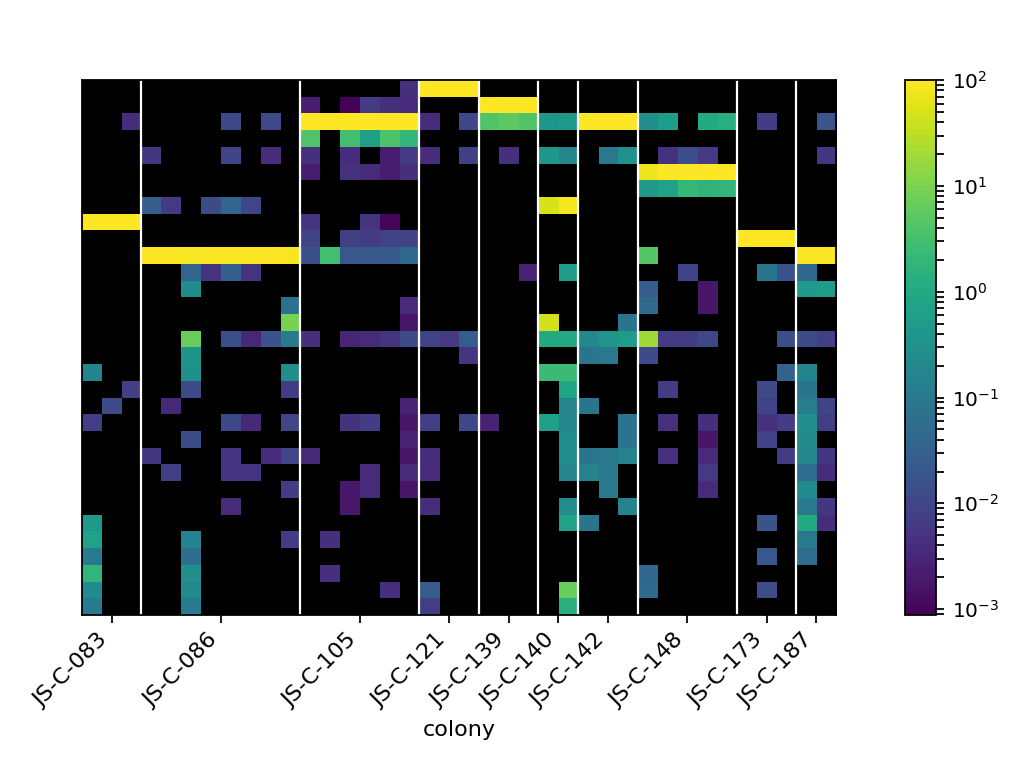

In [29]:
tt=datx.filter_samples('genus','Camponotus')

tt=tt.filter_prevalence(0.1)

tt=tt.cluster_features(10)

f=tt.normalize(100).plot_sort('colony',gui='jupyter',clim=[0,100], feature_field=None)

In [30]:
f.save_figure('figure-4D-ants-colony-camponotus.pdf')

## Dolichonderus (fig 4E)

2017-08-31 22:51:03 INFO 129 remaining
2017-08-31 22:51:03 INFO 121 remaining


<IPython.core.display.Javascript object>


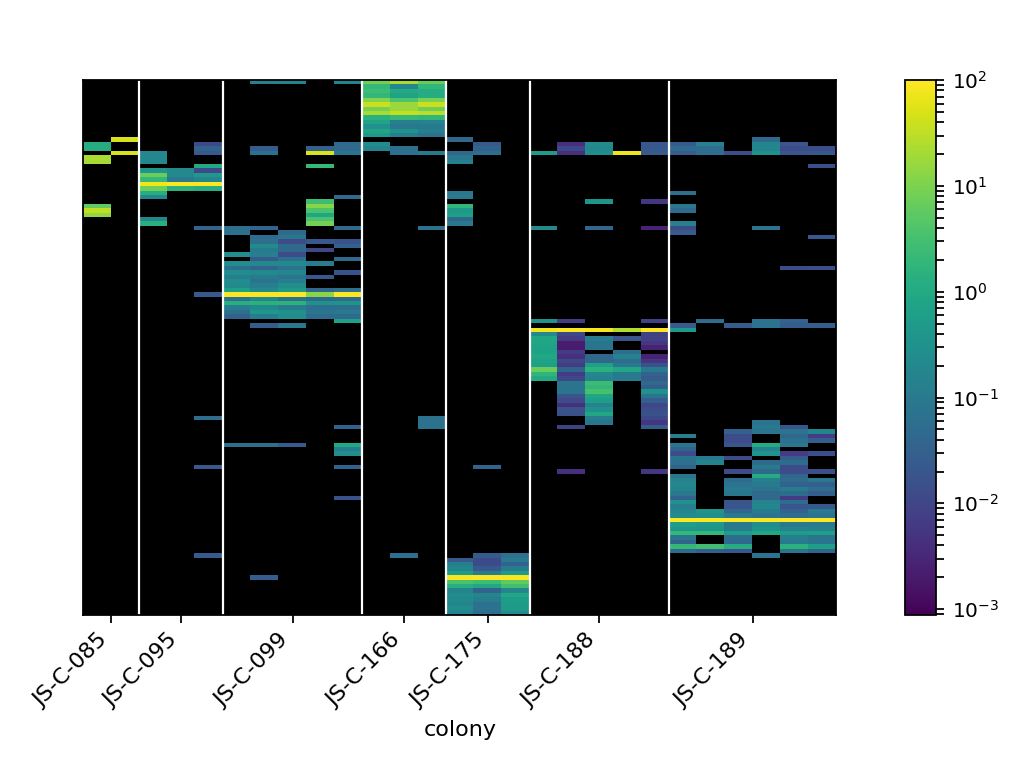

In [31]:
tt=datx.filter_samples('genus','Dolichoderus')

tt=tt.filter_prevalence(0.1)

tt=tt.cluster_features(10)

f=tt.normalize(100).plot_sort('colony',gui='jupyter',clim=[0,100], show_legend=False,feature_field=None)

In [32]:
f.save_figure('figure-4E-ants-colony-dolychonderus.pdf')

## Cephalotes

2017-08-31 22:51:13 INFO 133 remaining
2017-08-31 22:51:13 INFO 112 remaining


<IPython.core.display.Javascript object>


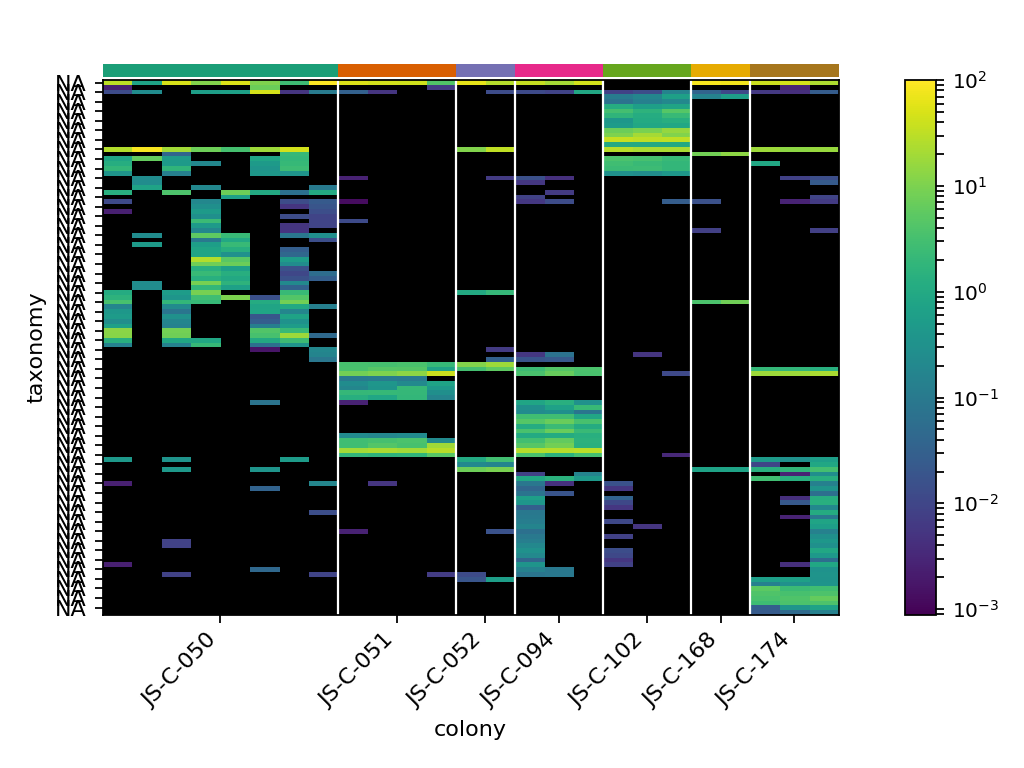

In [33]:
tt=datx.filter_samples('genus','Cephalotes')

tt=tt.filter_prevalence(0.1)

tt=tt.cluster_features(10)

f=tt.normalize(100).plot_sort('colony',gui='jupyter',sample_color_bars=['colony'],color_bar_label=False,clim=[0,100])

## Neoponera

2017-08-31 22:51:17 INFO 389 remaining
2017-08-31 22:51:18 INFO 362 remaining


<IPython.core.display.Javascript object>


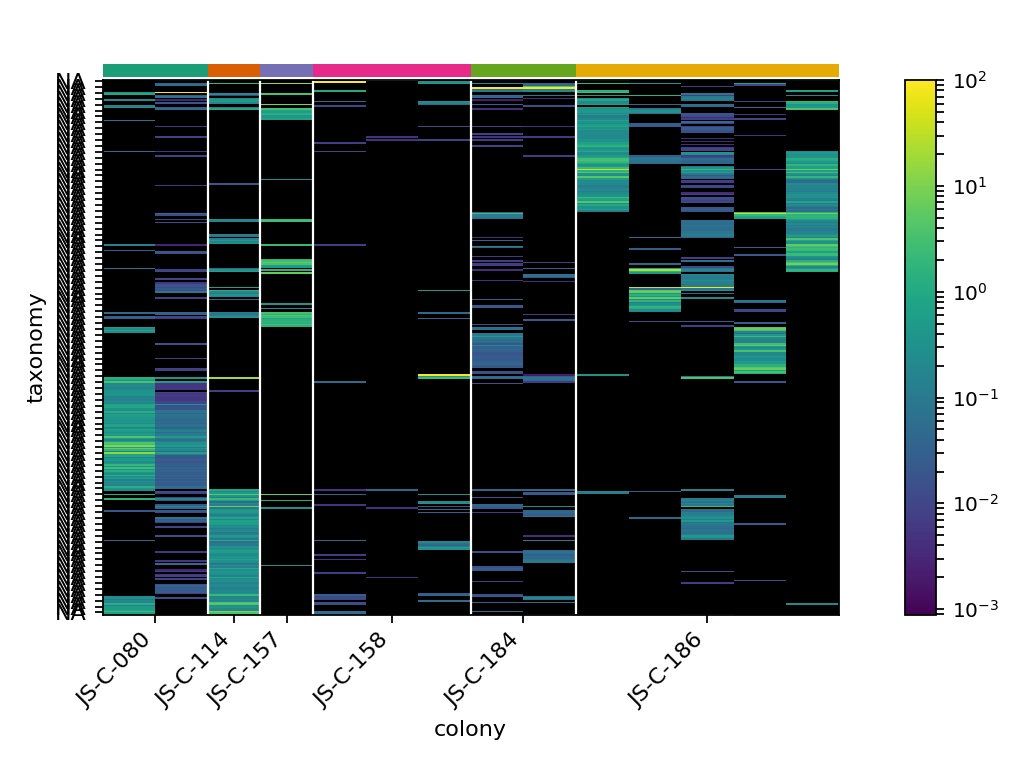

In [34]:
tt=datx.filter_samples('genus','Neoponera')

tt=tt.filter_prevalence(0.1)

tt=tt.cluster_features(10)

f=tt.normalize(100).plot_sort('colony',gui='jupyter',sample_color_bars=['colony'],color_bar_label=False,clim=[0,100])